In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris(as_frame = True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [4]:
# visualizing the trained decision tree

from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot",
    feature_names = ["petal length (cm)", "petal width (cm)"],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

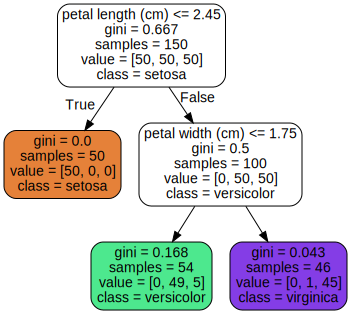

In [5]:
from graphviz import Source
Source.from_file("iris_tree.dot")

Note: Graphviz is an open source graph visualization software package. It also includes a dot command-line tool to convert .dot files to a variety of formats, such as PDF or PNG.

One of the many qualities of decision trees is that they require very
little data preparation. In fact, they don’t require feature scaling or
centering at all.

In [6]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

In [9]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [10]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)



tree_clf2.score(X_moons_test, y_moons_test)

0.92

In [11]:
tree_clf1.score(X_moons_test, y_moons_test)

0.898

Using Decision Trees for Regression

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [13]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # a single random input feature
y_quad = X_quad ** 2 + 0.025 + np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

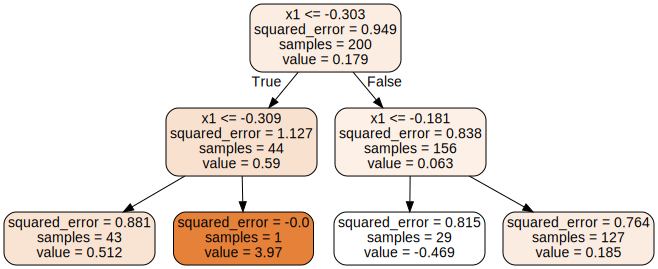

In [15]:
export_graphviz(
    tree_reg,
    out_file=str("regression_tree_1.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True)

Source.from_file("regression_tree_1.dot")

In [16]:
# Let's create a small pipeline that scales the data and rotates it using PCA, then train a DecisionTreeClassifier on taht data.

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)